In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from turb.lesgo_utils import lesgo_data
import pyutils.plot_utils as plt_utils

from matplotlib import cm, colors

ModuleNotFoundError: No module named 'turb'

In [2]:
result_dir = '/home/zyou6474/tasks/channel_flow'
dims = [128, 128, 64]
domain = [2*np.pi, np.pi, 1]

ldata = lesgo_data(domain, dims, result_dir, ntheta=3)

In [3]:
ldata.read_data(1)
ldata.read_debug(1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/zyou6474/tasks/channel_flow/outputs/advection.01.00000001'

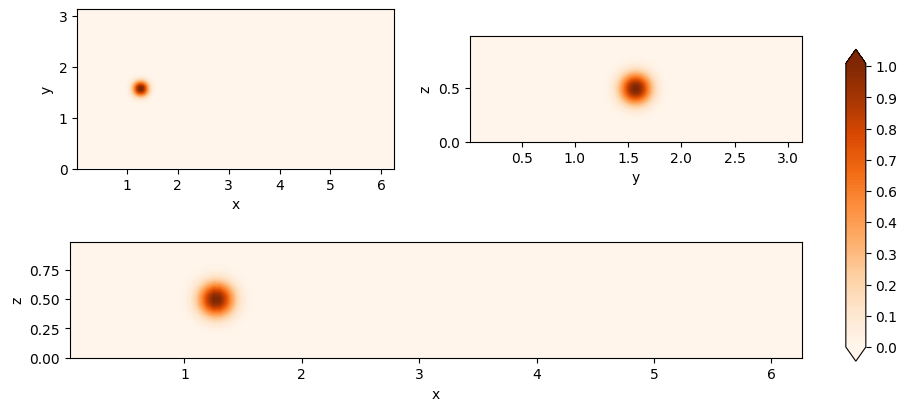

In [ ]:
fig, ax = plt_utils.contour_channel(ldata.coords, ldata.data['theta'][0])

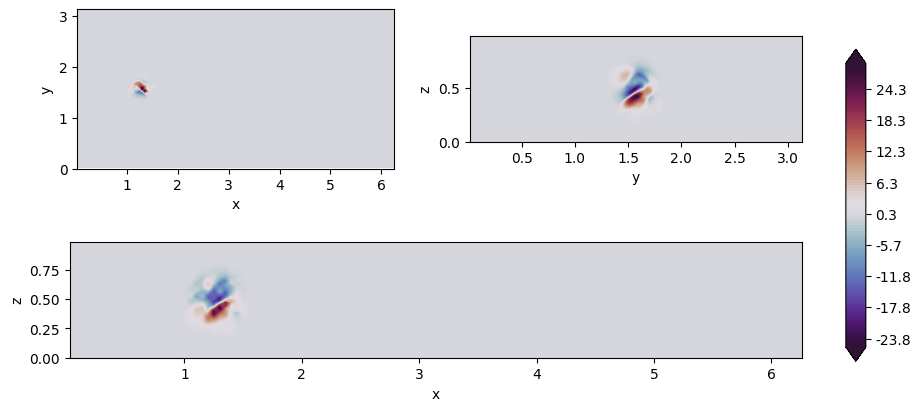

In [ ]:
fig, ax = plt_utils.contour_channel(ldata.coords, ldata.data['adv'][0], colormap=cm.twilight_shifted)

ValueError: Contour levels must be increasing

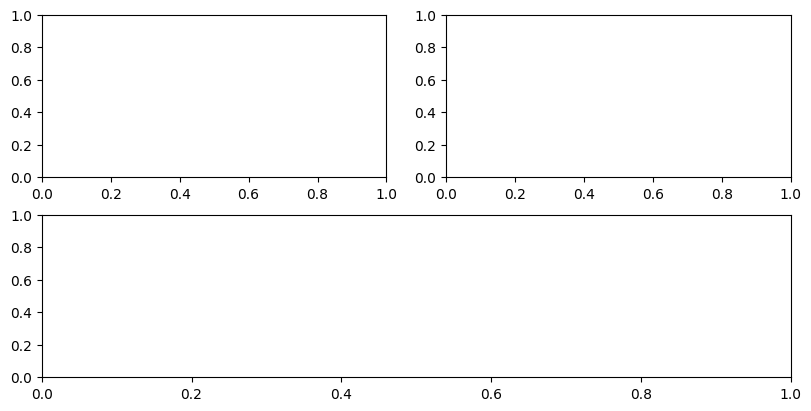

In [ ]:
fig, ax = plt_utils.contour_channel(ldata.coords, ldata.data['diff'][0], colormap=cm.twilight_shifted)

In this contour cross sections, the problem is much more obvious that there are some problem in z direction. Might be relative to interpolation or derivative calculation ( the way we calculate the derivative and interpolation in z direction is different from x and y direction.).

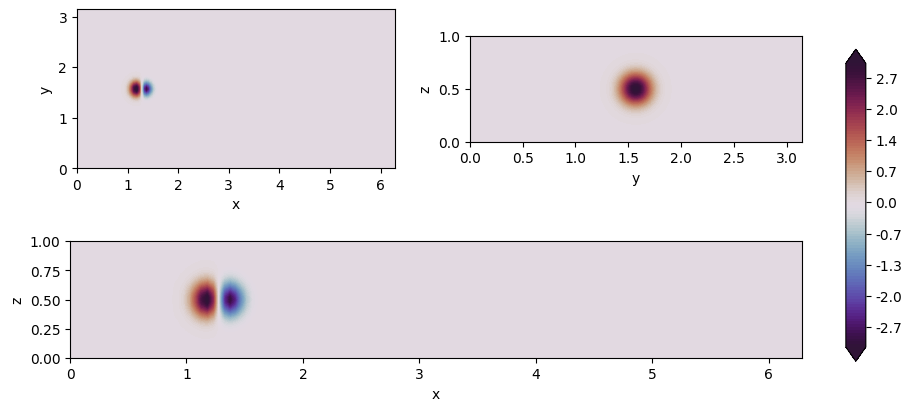

In [ ]:
fig, ax = plt_utils.contour_channel(ldata.ihalf_coords, ldata.data['dTdx'][0], colormap=cm.twilight_shifted)

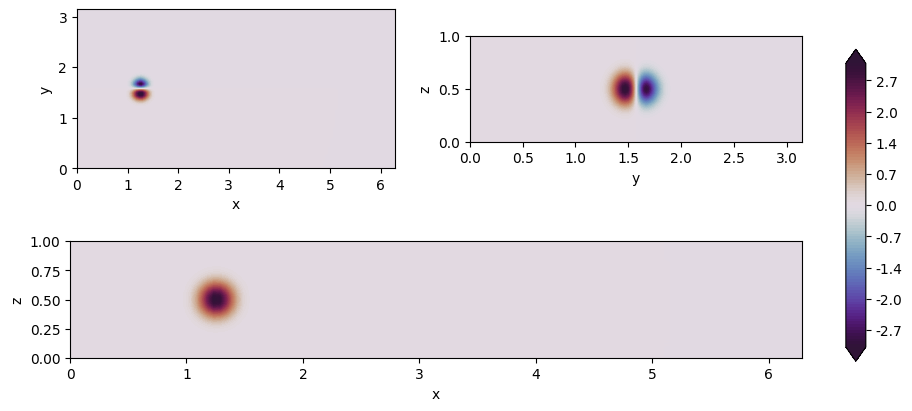

In [ ]:
fig, ax = plt_utils.contour_channel(ldata.jhalf_coords, ldata.data['dTdy'][0], colormap=cm.twilight_shifted)

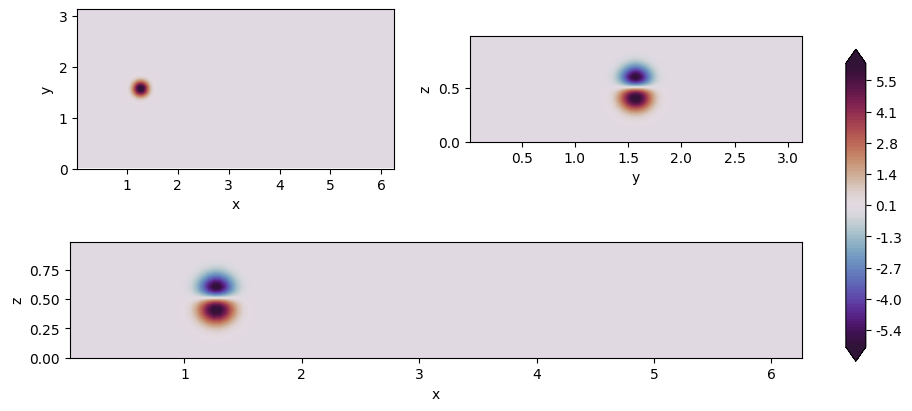

In [ ]:
fig, ax = plt_utils.contour_channel(ldata.coords, ldata.data['dTdz'][0], colormap=cm.twilight_shifted)

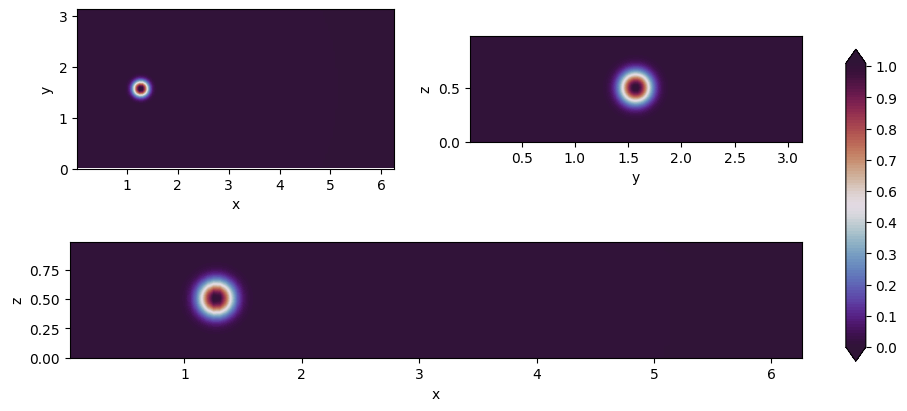

In [ ]:
fig, ax = plt_utils.contour_channel(ldata.coords, ldata.data['theta_kw'][0], colormap=cm.twilight_shifted)

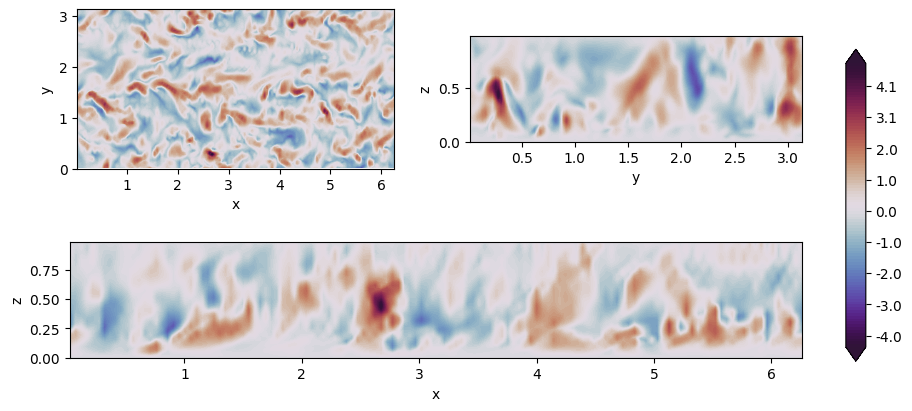

In [ ]:
fig, ax = plt_utils.contour_channel(ldata.coords, ldata.data['w_kw'][0], colormap=cm.twilight_shifted)

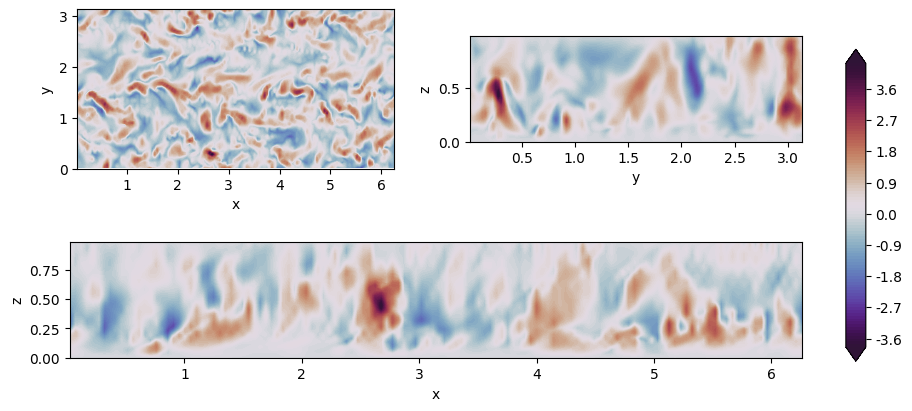

In [ ]:
fig, ax = plt_utils.contour_channel(ldata.coords, ldata.data['w'], colormap=cm.twilight_shifted)

`w` has ld elements in x direction so that in order to correctly output w, we need to be more specific about output. -> Above is correct now. So that the problem is the dTdz and theta_kw.

1. Check ddz function (dTdz).
1. Check z_ind=0 and Nz (theta_kw).

Although the variable are correct now. The plume is still not moving. Previous interpolation is based on derivative function, which is kind of dirty. Replace with separate function and see if it works.

Problem solved. Issue closed.

![](/home/zyou6474/Projects/ERI/notebooks/figures/theta_01_2023-06-27.gif)